		ПЯТИКРАТНЫЙ МЕТОД РУНГЕ-КУТТА

Колличество разбиений n =  16384 c шагом h =  0.0001220703125 



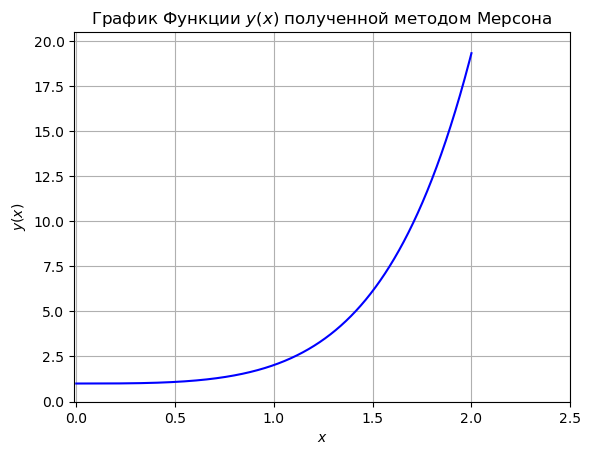

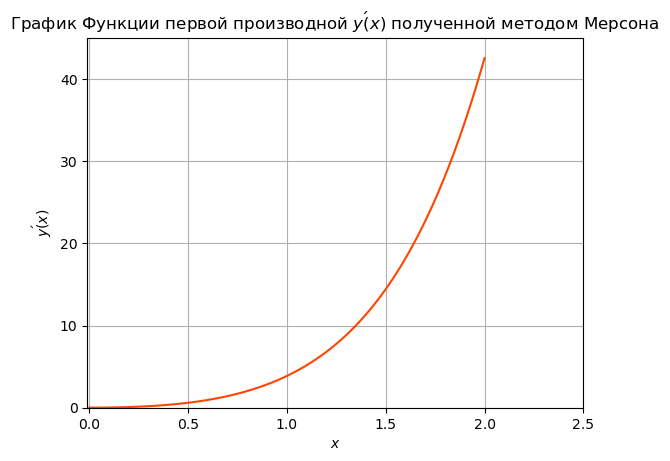

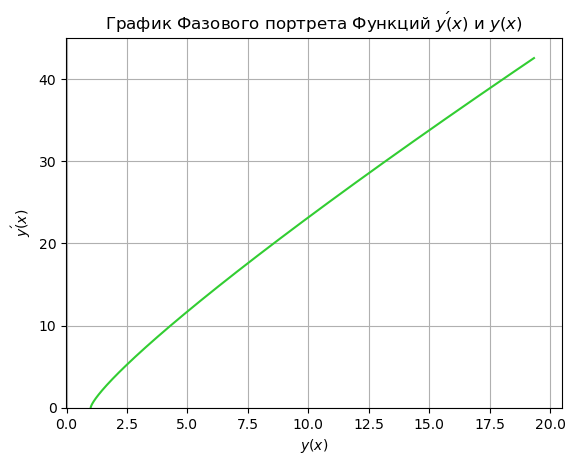

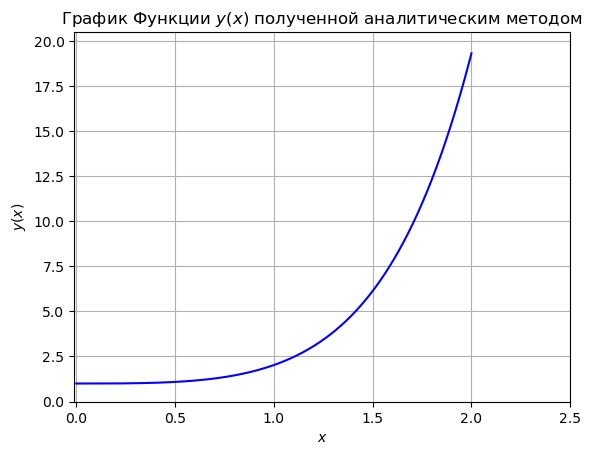

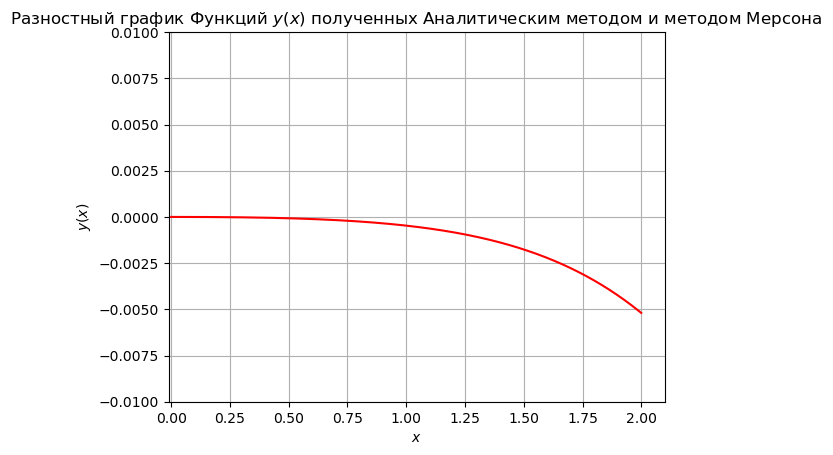

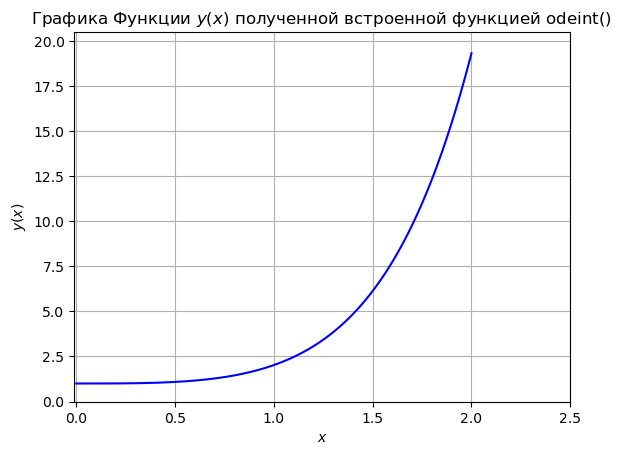

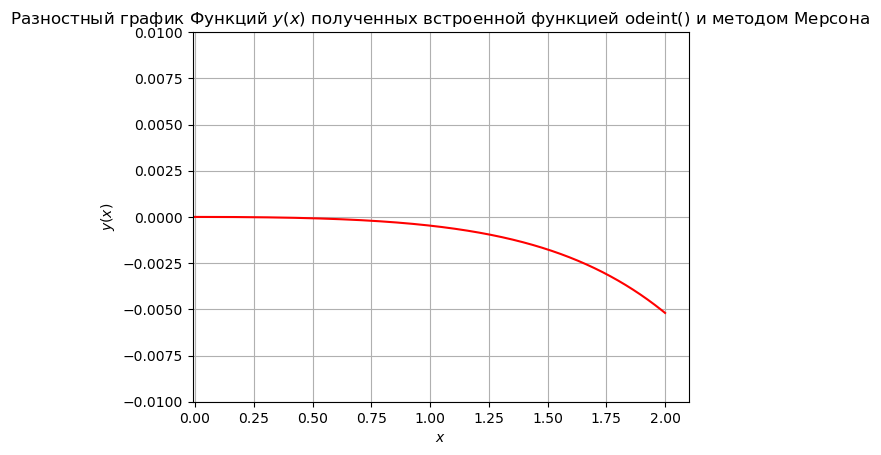

In [21]:
## Вариант No 9
### Решить методом Мерсона задачу Коши
### \\begin{cases}y''' - y'' + y' - 2y = cos(x)e^{2x}\\  y(0) = 1,\ y'(0) = 0,\ y''(0) = 0,\ x ∈ [0;2] \end{cases}
### с заданной относительной точностью 0,01.
### Требуется построение графиков решения $y(x)$, $y0(x)$, а также фазовых траекторий.
## Метод Мерсона
### Метод Мерсона - пятикратный метод Рунге-Кутта , является явным методом для решения задачи Коши.
### Если процесс описан дифференциальными уравнениями, то систему дифференциальных уравнений можно свести к задаче Коши, т.е. система имеет решение.
### Общий вид задачи Коши:
### \\begin{cases}y'(x) = f(x,y(x))\\ x ∈ (a;b),\ y(a) = y^0\end{cases} 
### заметим что $y(x) = (y_1(x), y_2(x),...,y_n(x))$ - является векторной функцией.
### Метод Рунге-Кутты , в отличие от метода Тейлора , позволяет не использовать в разностной схеме $φ(x,y,h)$ информацию о производных, а использовать коэффициенты $Ki$
### Общая разностная схема для метода Рунге-Кутты:
### $φ(x,y,h) =  \sum_{r=1}^m C_1K_r$ , где $K_r = f(x+ha_r,y+\sum_{s=1}^{r-1}b_{rs}K_s$, $ r∈ [2;m] $
### \\begin{cases}y^{n+1}=y^n+hφ(x_n,y_n,h)\\ y(x_0)=y^0,\ n ∈ [0;N-1],\ x_n ∈ ω_N\end{cases}
### Частный случий, когда m=5 - пятикратный метод Рунге-Кутта - Мерсона, разностная схема имеет вид:
### \\begin{cases}y^{n+1}=y^n+\frac{h}{2}(K_1+4K_4+K_5)\\ y(x_0)=y^0,\ n ∈ [0;N-1],\ x_n ∈ ω_N\end{cases}
### Сами коэффициенты расчитываются следующиим образом:
### $K_1=\frac{1}{3}f(x_n,y_n)$
### $K_2=\frac{1}{3}f(x_n+\frac{h}{3},y_n+hK_1)$
### $K_3=\frac{1}{3}f(x_n+\frac{h}{3},y_n+\frac{h}{2}K_1+\frac{h}{2}K_2)$
### $K_4=\frac{1}{3}f(x_n+\frac{h}{2},y_n+\frac{3}{8}hK_1+\frac{9}{8}hK_3)$
### $K_5=\frac{1}{3}f(x_n+h,y_n+\frac{3}{2}hK_1-\frac{9}{2}hK_3+6hK_4)$
### Важно заметить, что если линейное дифференциальное уравнение больше первого порядка то для решения задачи Коши следует сделать систему дифференциальных уравнений относительно замен - понижающих порядок дифференциального уравнения.
### В нашем случае система для  $y''' - y'' + y' - 2y = cos(x)e^{2x}$ будет выглядеть следующм образом : при $y_1=y$
### \\begin{cases}y_1'=y_2\\y_2'=y_3\\y_3'=2y_3-y_2+2y_1+cos(x)e^{2x}\end{cases}
### Тогда функция $f(x+ha_2,y+b_{21}hf(x,y))$ -вычисляющая точки в прирощениях, будет уже возвращать правую часть данной системы в векторном виде ,т.е.$y'(x_n), y''(x_n), y'''(x_n)$ тем самым коэффициенты $K_r$- станут в векторном виде и будут уже расчитывать и для производных замен.
### Выбор шага и критерий остановки осуществляется следующим образом:
### В задаче дан отрезок $x ∈ [0;2]$ выберем начальный шаг $h=0.5$ и сделаем с ним одну итерацию ,далее подели шаг пополам $h'=\frac{h}{2}$ и с данным шагом проводим вторую итерацию, заметив что с новым шагом $h'$ колличество точек функции увеличилось в два раза мы будем сверять значения функции $y(x_n+mh)$ при h с значениями функцииy $y(x_n+kh')$ при h'.так что $x_n+mh=x_n+kh'$
### Если $|y(x_n+mh)-y(x_n+kh')|<e$ , (где е машинная точность вычесления), то работа алгоритма останавливается, иначе мы снова делим шаг пополам $h'=\frac{h}{2}$ и сравнениваем значениния функции на предыдущем шаге h .
### Реализация метода Мерсона:


import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

#### Функция возращающая правую часть ситемы замен производных.
def f_system( y, x ):
    return  np.array([ y[1], y[2], 2*y[2] - y[1] + 2*y[0] + np.cos(x)*np.exp(2*x) ])

#### Функция, вычисляющая коэффициенты для пятикратного метода Рунге-Кутты и расчитывающая разностную схему $y^{n+1}=y^n+\frac{h}{2}(K_1+4K_4+K_5)$ в конкретной точке прирощения x_n.
def step( x, y, h ):
    
    k1 = 1./3. * f_system( y, x )
    k2 = 1./3. * f_system( y + h*k1, x + h/3. )
    k3 = 1./3. * f_system( y + h/2.*k1 + h/2.*k2, x + h/3. )
    k4 = 1./3. * f_system( y + 3./8.*h*k1 + 9./8.*h*k3, x + h/2. )
    k5 = 1./3. * f_system( y + 3./2.*h*k1 - 9./2.*h*k3 + 6*h*k4,  x + h )
    
    y_1 = y + h/2.*( k1 + 4*k4 + k5)
    
    return y_1

#### Функция, вычисляющая значения разностной схемы в каждой точке прирощения с шагом h .
def  Runge_Kutta ( x, y, h ):
    
    Y = {}
    Y_diff = {}
    
    while x!=2 :
        
        y = step( x, y, h )
        Y [x] = y[0]
        Y_diff[x] = y[1]
        x += h
    
    return Y, Y_diff
    

#### Главная функция, которая сравнивает значения функций, полученных методом Рунге-Кутты, на текущем шаге h'-с предыдущим шагом h, а так же регулирующая критерий остановки и деления шага .
def main (x, y, h, e ):
    
    Y, Y_diff = Runge_Kutta ( x, y, h )
    h /= 2
    check = True
    
    while check :
        
        Y1, Y_diff = Runge_Kutta ( x, y, h )
        Y_keys = Y.keys()
        cnt = 0
        for i in Y_keys:
            
            if abs(Y[i] - Y1[i]) < e :
                cnt += 1
                
        if cnt != len(Y_keys):
            h /= 2
            Y = Y1 
            
        else:
            break
            
        
    return Y1, Y_diff

#### Функция для отрисовки графиков.
def Draw_graphics ( name, xlabel, ylabel, color, x, xlim, ylim, List):
    
    plt.plot(x, List, color = color)
    plt.title(name)
    plt.grid()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xlim (-0.01, xlim)
    plt.ylim (-0.01, ylim)
    plt.show()

    
y, y_diff =  main(0,[1,0,0],0.5,0.01)
print('\t\tПЯТИКРАТНЫЙ МЕТОД РУНГЕ-КУТТА\n')
print('Колличество разбиений n = ',len(y),'c шагом h = ',2/len(y),'\n')    
y_values = list(y.values())
x_keys = list(y.keys())
y_diff_values = list(y_diff.values())   

##### Отрисовка Графика Функции $y(x)$ полученной методом Мерсона
Draw_graphics ( r'График Функции $y(x)$ полученной методом Мерсона ',r'$x$', r'$y(x)$','blue', x_keys, 2.5, 20.5, y_values )
##### Отрисовка Графика Функции первой производной $y\'(x)$ полученной методом Мерсона
Draw_graphics ( r'График Функции первой производной $y\'(x)$ полученной методом Мерсона ',r'$x$', r'$y\'(x)$','orangered', x_keys, 2.5, 45, y_diff_values )
##### Отрисовка Графика Фазового портрета Функций $y\'(x)$ и $y(x)$ '
Draw_graphics ( r'График Фазового портрета Функций $y\'(x)$ и $y(x)$ ', r'$y(x)$', r'$y\'(x)$', 'limegreen', y_values, 20.5, 45, y_diff_values )

### Решив линейное неоднородное дифференциальное уравнение третьего порядка $y''' - y'' + y' - 2y = cos(x)e^{2x}  y(0) = 1, y'(0) = 0, y''(0) = 0, x ∈ [0;2] $ при известных начальных условиях можно получить точное решение общего неоднородного решения как сумму общего решения однородного уравнения и частного решения неоднородного уравнения :
### $ y=\frac{e^{2x}sin(x)}{8} - \frac{11}{40}sin(x) - \frac{e^{2x}cos(x)}{8} + \frac{37}{40}cos(x) + \frac{e^{2x}}{5} $
#### Функция возращающая аналитическое решение дифференциального уравнения.
def analytical_Function (x):
    return np.exp(2*x)*np.sin(x)/8 - 11/40*np.sin(x) - np.exp(2*x)*np.cos(x)/8 + 37/40*np.cos(x) + np.exp(2*x)/5

##### Отрисовка Графика Функции $y(x)$ полученной аналитическим методом
y_analytical_values = []
for i in x_keys:
    y_analytical_values.append(analytical_Function (i))
    
Draw_graphics ( r'График Функции $y(x)$ полученной аналитическим методом ',r'$x$', r'$y(x)$','blue', x_keys, 2.5, 20.5, y_analytical_values  )

y_difference = list(np.array(y_analytical_values) - np.array(y_values))
##### Отрисовка Разностного графика Функций $y(x)$ полученных Аналитическим методом и методом Мерсона
Draw_graphics ( r'Разностный график Функций $y(x)$ полученных Аналитическим методом и методом Мерсона ',r'$x$', r'$y(x)$','red', x_keys, 2.1, 0.01, y_difference )


### Найдем решение задачи Коши с помощью встроенной функции odeint() метода integrate. из библиотеки scipy . Сопоставим получееные значения с исходным приближенным решениемБ полученным методом Мерсона.

asol = integrate.odeint(f_system,[1,0,0],x_keys)
y_odeint = []
for i in asol:
    y_odeint.append(i[0])
    
##### Отрисовка Графика Функции $y(x)$ полученной встроенной функцией odeint()   
Draw_graphics ( r'Графика Функции $y(x)$ полученной встроенной функцией odeint() ',r'$x$', r'$y(x)$','blue', x_keys, 2.5, 20.5, y_odeint )

y_difference = list(np.array(y_odeint) - np.array(y_values))
##### Отрисовка Разностного графика Функций $y(x)$ полученных встроенной функцией odeint() и методом Мерсона
Draw_graphics ( r'Разностный график Функций $y(x)$ полученных встроенной функцией odeint() и методом Мерсона ',r'$x$', r'$y(x)$','red', x_keys, 2.1, 0.01, y_difference )


